In [2]:
import numpy as np
class Perceptron(object):

    """Perceptron classifier.
    Parameters
    ------------
    eta : float
    Learning rate (between 0.0 and 1.0)
    n_iter : int
    Passes over the training dataset.
    
    Attributes
    -----------
    w_ : 1d-array
    Weights after fitting.
    errors_ : list
    Number of misclassifications in every epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
            
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
        
    def fit(self, X, y):
        """Fit training data.
        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples
        is the number of samples and
        n_features is the number of features.
        y : array-like, shape = [n_samples]
        Target values.
        Returns
        -------
        self : object
        """
        
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
        
        


In [152]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


raw_df = pd.read_csv('https://raw.githubusercontent.com/helenahu/Divorce-Prediction/master/divorce.csv')
data_matrix = []
for i in range(170):
    row = list(map(lambda x: int(x), raw_df.iloc[i,0].split(';') ))
    data_matrix.append(row)
df = pd.DataFrame(data_matrix)
df=df.sample(frac=1)
train_y = df.iloc[:34,54].values
test_y = df.iloc[34:,54].values
train_y = np.where(train_y==1,1,-1)
test_y = np.where(test_y==1,1,-1)
train_X = df.iloc[:34,:53].values
test_X = df.iloc[34:,:53].values


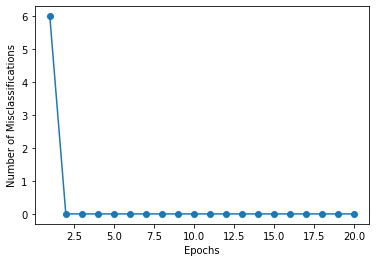

In [66]:
ppn = Perceptron(eta = 0.5, n_iter = 20)
ppn.fit(train_X,train_y)
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_,marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.show()

In [118]:
import urllib

# print prediction result
predict_y = ppn.predict(test_X)
print('Perceptron Learning: \n train/test: 63%/37% \n train_ error_rate:',list(test_y - predict_y).count(0)/len(test_y))
print()
txt = urllib.request.urlopen('https://raw.githubusercontent.com/helenahu/Divorce-Prediction/master/attr.txt').read()
attr = txt.decode().split('\n')
attr.pop()
seq = sorted(list(enumerate(ppn.w_)),key=lambda x: x[1])
print('Most significant 10 aspects that leads to divorce (Perceptron Result):')
for i in range(1,11):
    print(i,'. ',attr[seq[-i][0]].split('. ')[1],sep='')


Perceptron Learning: 
 train/test: 63%/37% 
 train_ error_rate: 0.9779411764705882

Most significant 10 aspects that leads to divorce (Perceptron Result):
1. When I talk to my spouse about something, my calm suddenly breaks.
2. My discussion with my spouse is not calm.
3. I can be humiliating when we discussions.
4. I feel right in our discussions.
5. Our discussions often occur suddenly.
6. I know my spouse's hopes and wishes.
7. I can tell you what kind of stress my spouse is facing in her/his life.
8. My spouse and I have similar values in trust.
9. My spouse and I have similar ideas about how marriage should be
10. We're compatible with my spouse about what love should be.


In [145]:
class AdalineGD(object):
    '''ADAptive LInear NEuron classifier.
    
    Parameters
    ------------
    eta: float 
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset.
        
    Attributes
    ------------
    w_: 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.
    '''
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
        
    def net_input(self,X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
    def fit(self, X, y):
        '''Fit training data.
        
        Parameters
        ------------------
        X: {array-like}, shape = [n_samples, n_features]
            Training vectors,
            where n_samples is the number of samples and n_features is the number of features.
        y: array-like, shape = [n_samples]
            Target values.
            
        Returns
        ---------------
        self: object
        '''
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
        return self
    
    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(X) >= 0.0, 1, -1) 

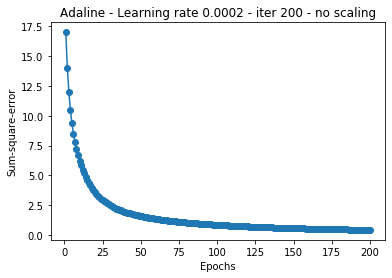

In [146]:
ada = AdalineGD(eta = 0.0002, n_iter = 200).fit(train_X,train_y)
plt.plot(range(1, len(ada.cost_)+1),ada.cost_,marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-square-error')
plt.title('Adaline - Learning rate 0.0002 - iter 200 - no scaling')
plt.show()

In [148]:
import urllib

# print prediction result
a_predict_y = ada.predict(test_X)
print('Adaptive Linear Neuron (no scaling): \n train/test: 63%/37% \n train_ error_rate:',list(test_y - a_predict_y).count(0)/len(test_y))
print()
txt = urllib.request.urlopen('https://raw.githubusercontent.com/helenahu/Divorce-Prediction/master/attr.txt').read()
attr = txt.decode().split('\n')
attr.pop()
seq = sorted(list(enumerate(ppn.w_)),key=lambda x: x[1])
print('Most significant 10 aspects that leads to divorce (Adaline Result):')
for i in range(1,11):
    print(i,'. ',attr[seq[-i][0]].split('. ')[1],sep='')


Adaptive Linear Neuron (no scaling): 
 train/test: 63%/37% 
 train_ error_rate: 0.9632352941176471

Most significant 10 aspects that leads to divorce (Adaline Result):
1. When I talk to my spouse about something, my calm suddenly breaks.
2. My discussion with my spouse is not calm.
3. I can be humiliating when we discussions.
4. I feel right in our discussions.
5. Our discussions often occur suddenly.
6. I know my spouse's hopes and wishes.
7. I can tell you what kind of stress my spouse is facing in her/his life.
8. My spouse and I have similar values in trust.
9. My spouse and I have similar ideas about how marriage should be
10. We're compatible with my spouse about what love should be.


In [153]:
#Feature Scaling -- standardization

X_std = np.copy(train_X)
for i in range(X_std.shape[1]):
    X_std[:,i] = (train_X[:,i] - train_X[:,i].mean()) / train_X[:,i].std()
test_X_std = np.copy(test_X)
for i in range(test_X.shape[1]):
    test_X_std[:,i] = (test_X[:,i] - test_X[:,i].mean()) / test_X[:,i].std()



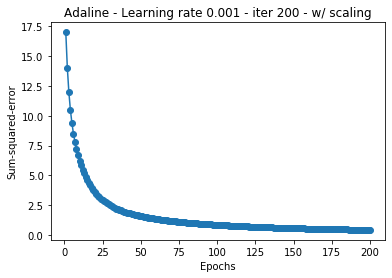

In [157]:
#train it again after standardization
ada2 = AdalineGD(n_iter = 200, eta = 0.001)
ada2.fit(X_std,train_y)

plt.plot(range(1, len(ada.cost_)+1),ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.001 - iter 200 - w/ scaling')
plt.show()

In [158]:
import urllib

# print prediction result
as_predict_y = ada2.predict(test_X_std)
print('Adaptive Linear Neuron (w/ scaling): \n train/test: 63%/37% \n train_ error_rate:',list(test_y - as_predict_y).count(0)/len(test_y))
print()

seq = sorted(list(enumerate(ppn.w_)),key=lambda x: x[1])
print('Most significant 10 aspects that leads to divorce (Adaline Result w/ scaling):')
for i in range(1,11):
    print(i,'. ',attr[seq[-i][0]].split('. ')[1],sep='')


Adaptive Linear Neuron (w/ scaling): 
 train/test: 63%/37% 
 train_ error_rate: 0.9264705882352942

Most significant 10 aspects that leads to divorce (Adaline Result w/ scaling):
1. When I talk to my spouse about something, my calm suddenly breaks.
2. My discussion with my spouse is not calm.
3. I can be humiliating when we discussions.
4. I feel right in our discussions.
5. Our discussions often occur suddenly.
6. I know my spouse's hopes and wishes.
7. I can tell you what kind of stress my spouse is facing in her/his life.
8. My spouse and I have similar values in trust.
9. My spouse and I have similar ideas about how marriage should be
10. We're compatible with my spouse about what love should be.
